In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import statsmodels.formula.api as smf

In [2]:
# Import Dataset
data = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\4 Simple Linear Regression\delivery_time.csv")

In [3]:
# Check Data
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Rename Column name 
data = data.rename(columns={"Delivery Time":"DeliveryTime",
                       "Sorting Time":"SortingTime"})

In [5]:
# Check Categorical Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# Check Null Values 
data.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18b4683eac0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b4685f0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b4683e7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b4685f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b4685f910>],
 'means': []}

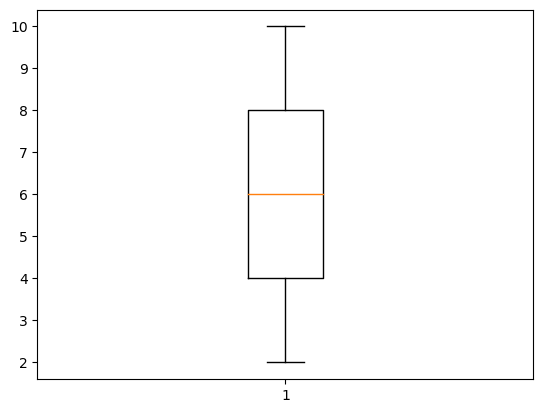

In [7]:
# Check Outlier and Visulization
plt.boxplot(data['SortingTime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18b468e20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b468e2670>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b468d0dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b468e2c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b468e2ee0>],
 'means': []}

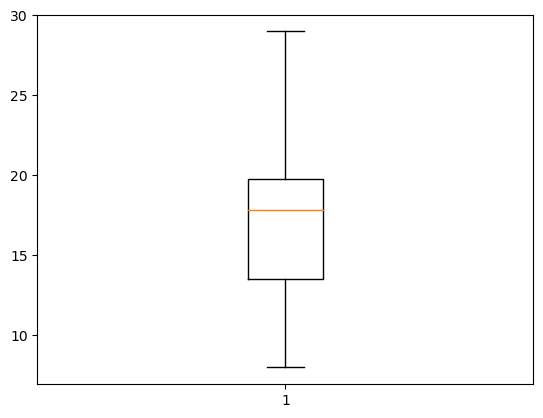

In [8]:
plt.boxplot(data['DeliveryTime'])

In [9]:
# Correlation Between both variables 
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


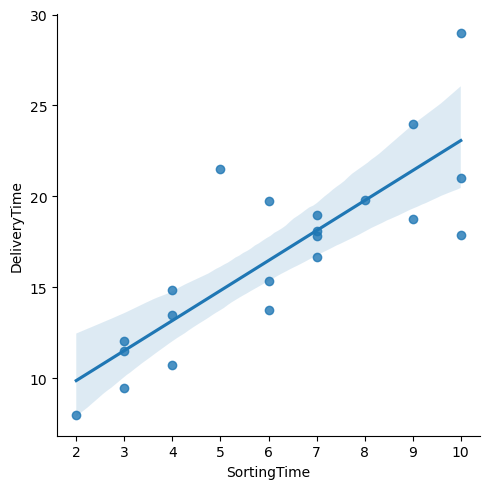

In [10]:
sns.lmplot(x='SortingTime',y='DeliveryTime', data=data)

In [11]:
# Splitting Independent and Dependent Variables
X = data.iloc[:,1:].values

In [12]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [32]:
y = data.iloc[:,:1].values

In [33]:
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [15]:
# Spliting Data set train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train

array([[ 8],
       [ 3],
       [ 2],
       [ 7],
       [ 7],
       [10],
       [ 6],
       [ 6],
       [ 6],
       [ 9],
       [ 3],
       [ 7],
       [ 9],
       [10],
       [ 4],
       [ 7]], dtype=int64)

In [17]:
y_train

array([[19.83],
       [12.03],
       [ 8.  ],
       [19.  ],
       [17.83],
       [29.  ],
       [19.75],
       [15.35],
       [13.75],
       [18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

In [18]:
X_test

array([[10],
       [ 3],
       [ 5],
       [ 4],
       [ 4]], dtype=int64)

In [19]:
y_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75]])

In [20]:
# Fit Linear Regression Model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
# predict X_test Value
y_pred = regression.predict(X_test)

In [22]:
print('Original Value',y_test)
print()
print('Predicted Value',y_pred)

Original Value [[17.9 ]
 [11.5 ]
 [21.5 ]
 [13.5 ]
 [10.75]]

Predicted Value [[23.97793478]
 [10.70456522]
 [14.49695652]
 [12.60076087]
 [12.60076087]]


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


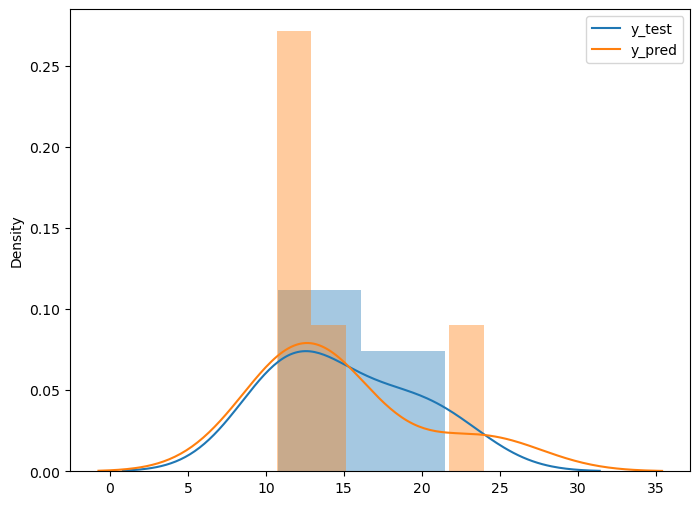

In [23]:
plt.figure(figsize = (8,6))
labels = ['y_test', 'y_pred']
sns.distplot(y_test)
sns.distplot(y_pred)
plt.legend(labels)

In [24]:
# Check Evalution Metrices
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
rmse = mean_squared_error(y_true = y_test, y_pred = y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)
r_square = r2_score(y_true = y_test, y_pred = y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('mape',mape)
print('AdjSquare',r_square)

mae 3.3252826086956495
mse 18.170114496691856
rmse 4.262641727461019
mape 0.19464294628347828
AdjSquare -0.09171780724674083


In [25]:
# Other Method to predict the data.
model = smf.ols('DeliveryTime ~ SortingTime',data=data).fit()

In [26]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [27]:
# Predict new input data set 
inputdata = [12,15]
input_pred = pd.DataFrame(inputdata, columns = ['SortingTime'])
input_pred

,SortingTime
0,12
1,15


In [28]:
# using smf.ols method
model.predict(input_pred)

0    26.370973
1    31.318032
dtype: float64

In [29]:
# using linear regression method
regression.predict(input_pred)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[27.77032609],
       [33.45891304]])